Cross-validation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

# test train split #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.9736842105263158


In [5]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
#分成五組train及 test data 在進行平均
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.9733333333333334


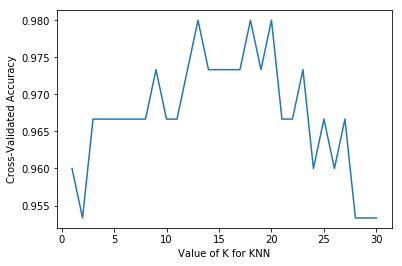

In [8]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
##  loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error') # for regression
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # for classification
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

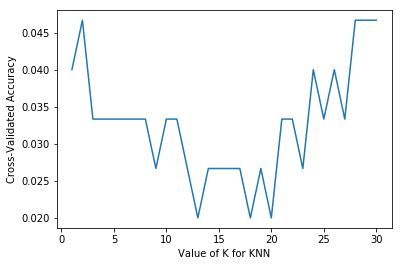

In [18]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error') # for regression
##  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # for classification
    k_scores.append(loss.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [15]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

Cross-validation 2

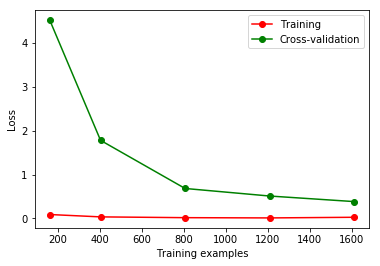

In [25]:
from sklearn.model_selection import  learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

train_sizes, train_loss, test_loss= learning_curve(
        SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error',  #gamma 0.01時有overfiting 0.001時無
        train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()


Cross-validation 3

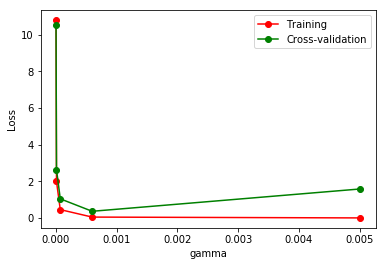

In [27]:
from sklearn.model_selection import  validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(
        SVC(), X, y, param_name='gamma', param_range=param_range, cv=10,
        scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

根據圖片數據 gamma值可選擇0.005~0.006